# Install Behave

In [1]:
!pip install git+https://github.com/behave/behave

  Cloning https://github.com/behave/behave to c:\users\kiranmoy_paul\appdata\local\temp\pip-req-build-ikwl7k4x
  Resolved https://github.com/behave/behave to commit ac8b1a730bd6729f8c7648442789076ee0bd3d68
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached parse-1.20.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached parse_type-0.6.4-py2.py3-none-any.whl.metadata (12 kB)
Using cached parse-1.20.2-py2.py3-none-any.whl (20 kB)
Using cached parse_type-0.6.4-py2.py3-none-any.whl (27 kB)
  Created wheel for behave: filename=behave-1.2.7.dev7-py2.py3-none-any.whl size=200449 sha256=9bdb2bd4ac9dd33e2d474323d930c7369ad0a4ec05a324ab8429c99c4c98386e
  Stored in directory: C:\Users\Kiranmoy_Paul\AppData\

  Running command git clone --filter=blob:none --quiet https://github.com/behave/behave 'C:\Users\Kiranmoy_Paul\AppData\Local\Temp\pip-req-build-ikwl7k4x'


# Feature file: `BookAPI.feature`

```behave
Feature: Verify if books are added and deleted using Library API

  Scenario: Verify AddBook API functionality
    Given the book details which needs to be added to library
    When we execute the AddBook POST api method
    Then book is successfully added
```

# Generate step definition using behave

Run **`behave`** in command line.

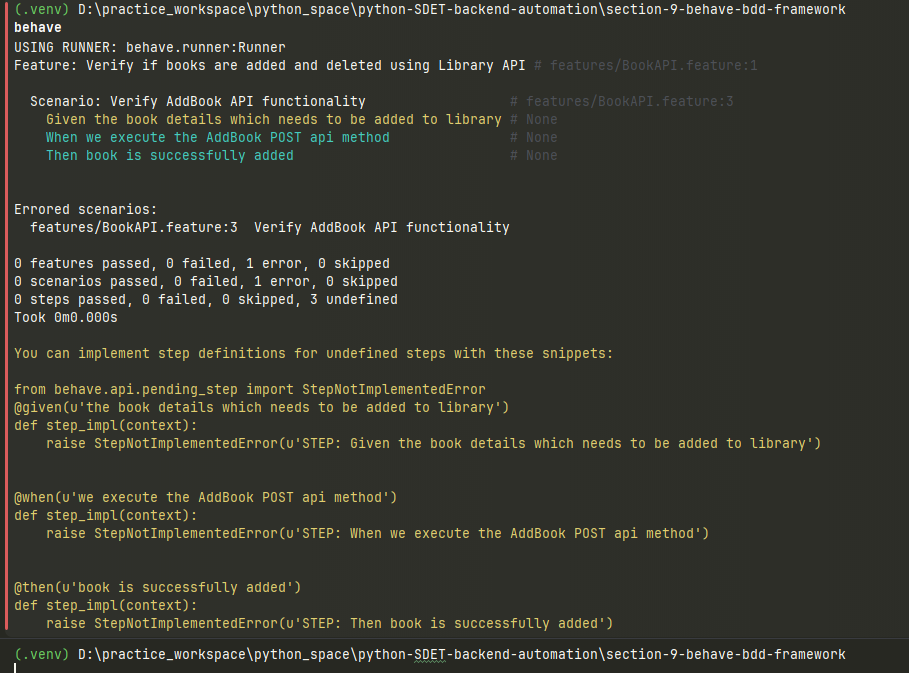

```python
You can implement step definitions for undefined steps with these snippets:

from behave.api.pending_step import StepNotImplementedError
@given(u'the book details which needs to be added to library')
def step_impl(context):
    raise StepNotImplementedError(u'STEP: Given the book details which needs to be added to library')


@when(u'we execute the AddBook POST api method')
def step_impl(context):
    raise StepNotImplementedError(u'STEP: When we execute the AddBook POST api method')


@then(u'book is successfully added')
def step_impl(context):
    raise StepNotImplementedError(u'STEP: Then book is successfully added')
```

# Using `context` variable to share data among steps

```python
import requests

import globalConfigurations
from behave import given, when, then
from apiresources import APIResources


@given("the book details which needs to be added to library")
def step_impl(context):
    context.payload = {
        "name": "Learn Appium Automation with Java",
        "isbn": "bcd",
        "aisle": "227",
        "author": "John foe"
    }

    context.req_headers = {
        "Content-Type": "application/json"
    }

    URL = "{}{}".format(globalConfigurations.getHost(), APIResources.add_book)
    print(URL)

    context.url = URL

@when("we execute the AddBook POST api method")
def step_impl(context):
    req_response = requests.post(url=context.url, json=context.payload, headers=context.req_headers)
    print(req_response)
    context.req_response = req_response


@then("book is successfully added")
def step_impl(context):
    status_code = context.req_response.status_code
    print(status_code)
    assert status_code == 200

    response_body = context.req_response.json()
    print(response_body)
    assert response_body["Msg"]=="successfully added"
```

Execute feature file with standard output: **`behave features/BookAPI.feature --no-capture`**

# Hooks - **`features/enviroment.py`**

Hooks are used for test setup & teardown. 

Behave looks for **`environment.py`** file under the **`features`** folder for finding Hooks.

```python
import requests


def after_scenraio(context, scenario):
    
    # @Library tag in Scenario
    if "Library" in scenarios.tags:
        
        payload = {"ID": context.bookId}    
        req_headers = {"Content-Type": "application/json"}    
        response = requests.delete(url="http://rahulshettyacademy.com/Library/DeleteBook.php",
                                   json=payload, headers=req_headers)
        print(response.status_code)
        assert response.status_code == 200
```

# Test Parameterization using **`Scenario Outline`** & **`Examples`** keyword

## features/BookAPI.feature

```
 Scenario Outline: Verify AddBook API functionality
    Given the book details with <isbn> and <aisle>
    When we execute the AddBook POST api method
    Then book is successfully added
  Examples:
  | isbn | aisle |
  | abc  | 123   |
  | xyz  | 456   |
```

## features/steps/stepImpl.py

```python
@given("the book details with {isbn} and {aisle}")
def step_impl(context, isbn, aisle):
    pass
```

# Use Tags to run selected test cases

```
Feature: Verify if books are added and deleted using Library API

  @regression
  Scenario Outline: Verify AddBook API functionality
    Given the book details with <isbn> and <aisle>
    When we execute the AddBook POST api method
    Then book is successfully added
  Examples:
  | isbn | aisle |
  | abc  | 123   |
  | xyz  | 456   |
```

**COMMAND-LINE**: `behave features/BookAPI.feature --no-capture --tags=regression`

# Reusable Step Definition

**`feature/GitHubAPI.feature`**


```
Scenario: Session management check
    Given github repo credentials
    When submit getRepo API
    Then status code of response should be 200

Scenario: Session management check
    Given invalid github repo credentials
    When submit getRepo API
    Then status code of response should be 401
```


**`features/steps/step_impl.py`**

```python
@then("status code of response should be {status:d}")
def step_impl(context, status):
    assert context.response.status_code == status
```

# allure-behave test report for BDD

## Quick Start

1. `pip install allure-behave`
2. `behave -f allure_behave.formatter:AllureFormatter -o %allure_result_folder% ./features`
3. Install & Start Allure Command-line Server
4. `allure serve %allure_result_folder%`


## Install allure-behave

In [2]:
!pip install allure-behave

## Generate JSON files for allure report

**`behave --no-capture -f allure_behave.formatter:AllureFormatter -o allureReports`**

> Note: `-o` specifies the folder to store the reports. Here, the report will be stored in `allureReports` folder.

## Install & Start Allure Command-line Server

https://allurereport.org/docs/install-for-windows/

## Generate Allure report

**SYNTAX**: allure serve %allure_result_folder%

**`allure serve allureReports`**